## McDonald's Sentiment Analysis

In the sentiment analysis section, I imported the dataset and examined its columns, head, sample records, and information to gain a better understanding of the data. I then utilized the SentimentIntensityAnalyzer, a popular sentiment analysis tool, to calculate sentiment scores for each text entry. Based on these sentiment scores, I classified the text into different sentiment categories. For example, if the sentiment score was positive, I flagged the text as positive sentiment. Similarly, for negative sentiment scores, I labeled the text as negative sentiment. This process allowed me to categorize the dataset based on sentiment and gain insights into the overall sentiment distribution.

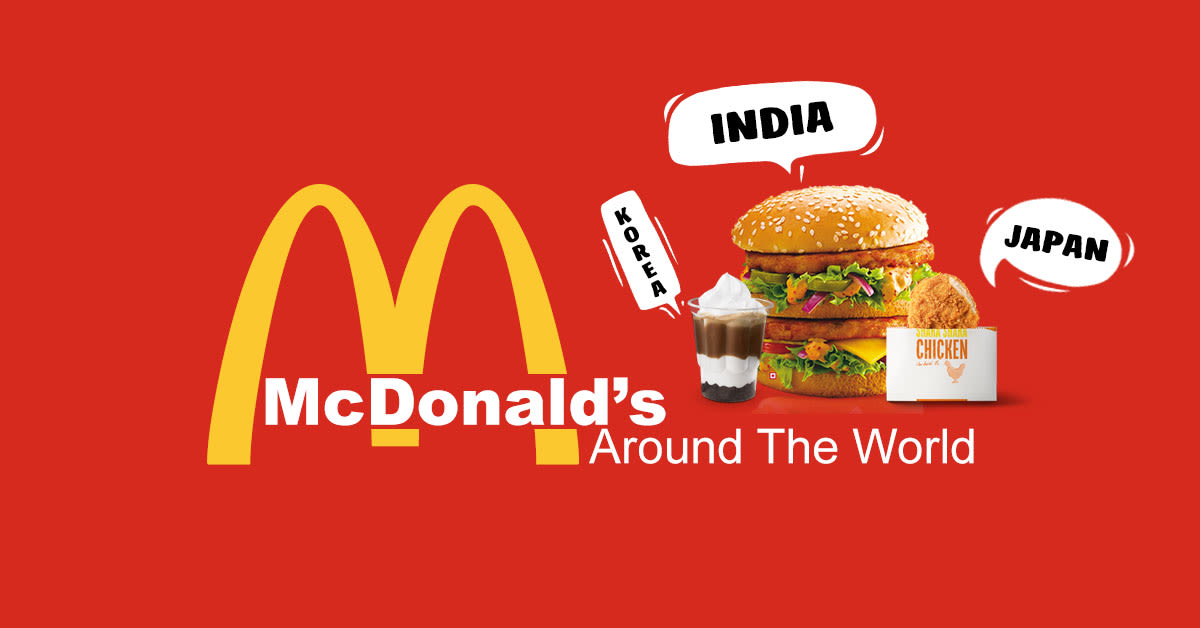

In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
# Load the dataset
data = pd.read_csv('McDonald_s_Reviews.csv',encoding="latin-1")

### Domain Analysis
* reviewer_id: Unique identifier for each reviewer (anonymized)
* store_name: Name of the McDonald's store
* category: Category or type of the store
* store_address: Address of the store
* latitude: Latitude coordinate of the store's location
* longitude: Longitude coordinate of the store's location
* rating_count: Number of ratings/reviews for the store
* review_time: Timestamp of the review
* review: Textual content of the review
* rating: Rating provided by the reviewer

In [3]:
# Firts five rows
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [4]:
# Last five rows
data.tail()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.81,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.81,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.81,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.81,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars
33395,33396,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.81,-80.189098,"2,810",2 years ago,they took good care of me,5 stars


In [5]:
# Shape of data
data.shape

(33396, 10)

* Dataset contains 10 features with 33396 observations.

In [6]:
# Columns in data
data.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [8]:
# Statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
reviewer_id,33396.0,16698.500000,9640.739131,1.000000,8349.750000,16698.500000,25047.250000,33396.00000
latitude,32736.0,34.442546,5.344116,25.790295,28.655350,33.931261,40.727401,44.98141
longitude,32736.0,-90.647033,16.594844,-121.995421,-97.792874,-81.471414,-75.399919,-73.45982


In [9]:
# Statistics of data for categorical data
data.describe(include='O')

,store_name,category,store_address,rating_count,review_time,review,rating
count,33396,33396,33396,33396,33396,33396,33396
unique,2,1,40,51,39,22285,5
top,McDonald's,Fast food restaurant,"9814 International Dr, Orlando, FL 32819, Unit...","2,810",4 years ago,Excellent,5 stars
freq,33325,33396,1890,1140,6740,2148,10274


### Sentiment Score Calculation

In [10]:
s = SentimentIntensityAnalyzer()

In [11]:
# Performing sentiment analysis on each review
sentiments = []
for review in data['review']:
    sentiment = s.polarity_scores(review)
    sentiments.append(sentiment)

### Sentiment Classification

In [12]:
sentiment_labels = []
for sentiment in sentiments:
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        sentiment_labels.append('Positive')
    elif compound_score <= -0.05:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

In [13]:
# Add the sentiment labels to the DataFrame
data['sentiment'] = sentiment_labels

In [14]:
data[['review', 'sentiment']]

,review,sentiment
0,Why does it look like someone spit on my food?...,Positive
1,It'd McDonalds. It is what it is as far as the...,Positive
2,Made a mobile order got to the speaker and che...,Negative
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,Neutral
4,"I repeat my order 3 times in the drive thru, a...",Negative
...,...,...
33391,They treated me very badly.,Negative
33392,The service is very good,Positive
33393,To remove hunger is enough,Negative
33394,"It's good, but lately it has become very expen...",Positive


## Splitting dataset train & test

In [15]:
X = data['review']
y = data['sentiment']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Support Vector Classifier

In [18]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_tfidf, y_train)

SVC()

In [19]:
y_pred = model.predict(X_test_tfidf)

In [20]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8868263473053892


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.88      0.84      1937
     Neutral       0.88      0.82      0.85      1244
    Positive       0.93      0.91      0.92      3499

    accuracy                           0.89      6680
   macro avg       0.88      0.87      0.87      6680
weighted avg       0.89      0.89      0.89      6680



In [22]:
def predict_sentiment(review):
    review_tfidf = vectorizer.transform([review])
    sentiment = model.predict(review_tfidf)
    return sentiment[0]

In [23]:
new_review = "This restaurant has excellent service and delicious food."
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Positive


In [24]:
new_review2 = "This restaurant sucks."
predicted_sentiment = predict_sentiment(new_review2)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Negative
